# LIBRARIES USED FOR LOGISTIC REGRESSION

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## SET THE COLOR THEME FOR SEABORN
sns.set_theme(color_codes=True)

# PANDAS DATA FRAME TO DISPLAY ALL COLUMNS
pd.set_option('display.max_columns',None)

# PANDAS DATA FRAME WITH 3 DECMIMAL PLACES
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# PANDAS DISPLAY WITH SET
pd.set_option('display.width', 500)

# SKLEARN LIBRARIES
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_validate

# IMPORT THE DATA SET - DIABETIES.CSV

In [17]:
df = pd.read_csv("diabetes.csv")

In [18]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [19]:
df.shape

(768, 9)

TARGET IS A CATEGORICAL VALUES OF 1's AND 0's

In [20]:
# TO CHECK HOW MANY INSTANCES ARE THERE IN EACH CATEGORICAL CLASS
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

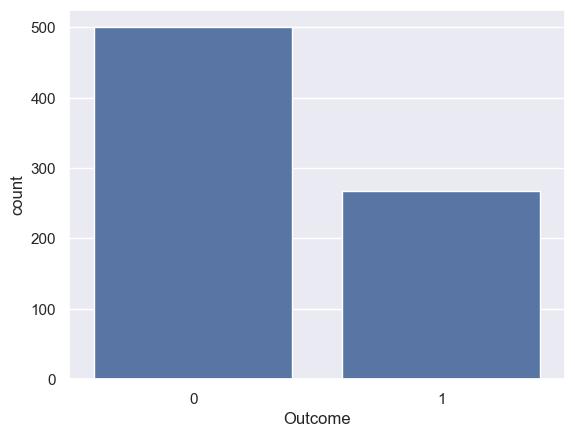

In [23]:
# VISUALIZE THE FREQUENCES USING COUNT PLOT METHOD IN SEABORN LIBRARY
sns.countplot(x="Outcome", data=df)
plt.show()

In [24]:
# PROPORTION OF CLASS ONE AND ZERO ARE WHEN CONSIDERING THE ENTIRE DATA SET

# BY DIVIDING THE EXPRESSION BY THE SIZE OF THE DATA SET AND MULTIPLYING BY 100
100 * df["Outcome"].value_counts() / len(df)

Outcome
0   65.104
1   34.896
Name: count, dtype: float64

In [25]:
# ANALYSE OUR INDEPENDENT VARIABLES
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000,3.845,3.370,0.000,1.000,3.000,6.000,17.000
Glucose,768.000,120.895,31.973,0.000,99.000,117.000,140.250,199.000
BloodPressure,768.000,69.105,19.356,0.000,62.000,72.000,80.000,122.000
SkinThickness,768.000,20.536,15.952,0.000,0.000,23.000,32.000,99.000
Insulin,768.000,79.799,115.244,0.000,0.000,30.500,127.250,846.000
BMI,768.000,31.993,7.884,0.000,27.300,32.000,36.600,67.100
DiabetesPedigreeFunction,768.000,0.472,0.331,0.078,0.244,0.372,0.626,2.420
Age,768.000,33.241,11.760,21.000,24.000,29.000,41.000,81.000
Outcome,768.000,0.349,0.477,0.000,0.000,0.000,1.000,1.000


# HISTOGRAM ON BLOOD PRESSURE

VISUALIZING NUMBERIC VARIABLES - 2 THINGS SHOULD COME TO MIND
ONE IS BOX PLOT AND ANOTHER IS HISTOGRAM

HISTOGRAME SHOWS THE FRUQUENCY OF OBSERVATIONS OF NUMERICAL VARIABLE WITHIN CERTAIN RANGES

BOX PLOT PROVIDES INFORMATION ABOUT THE DISTRIBUTION OF THE VARIABLE AFTER ARRANGING ITS VALUES FROM SMALLES TO LARGEST

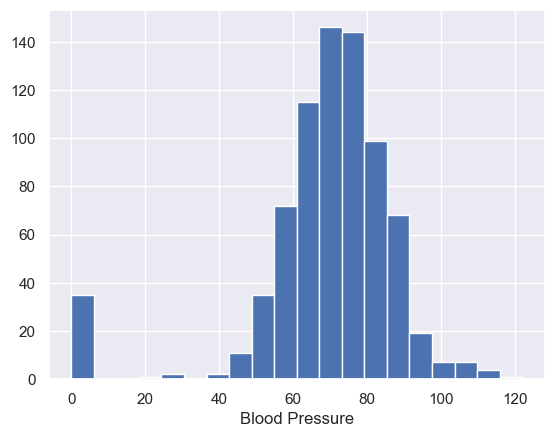

In [26]:
df["BloodPressure"].hist(bins=20)
plt.xlabel("Blood Pressure")
plt.show()

In [28]:
## USING FUNCTIONS FOR ALL NUMERICAL VALUES
def plot_numerical_col(dataframe, numerical_col):
    dataframe[numerical_col].hist(bins=20)
    plt.xlabel(numerical_col)
    plt.show(block=True)

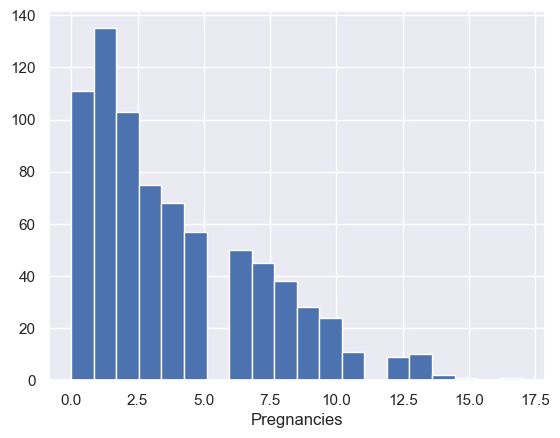

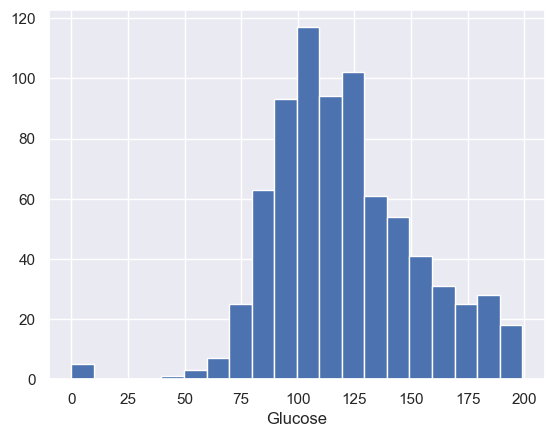

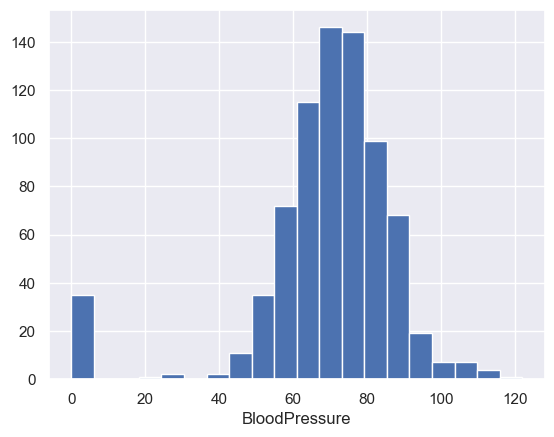

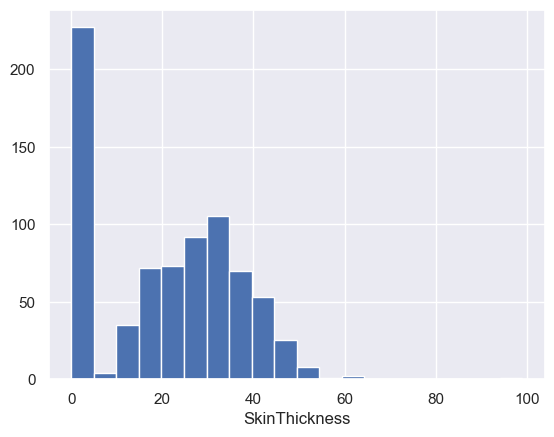

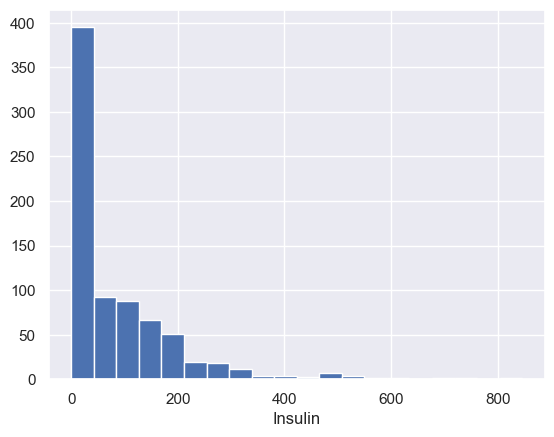

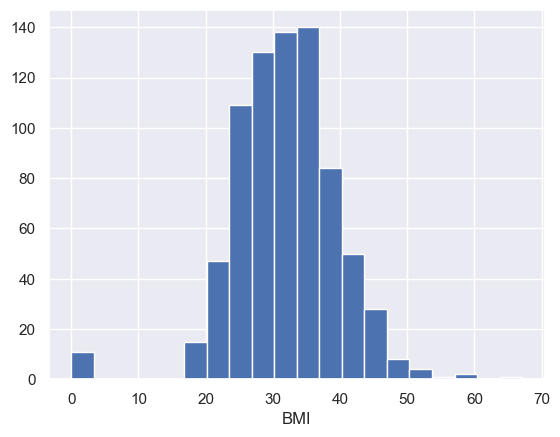

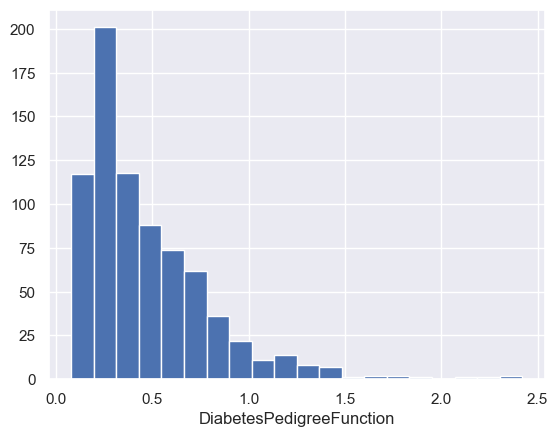

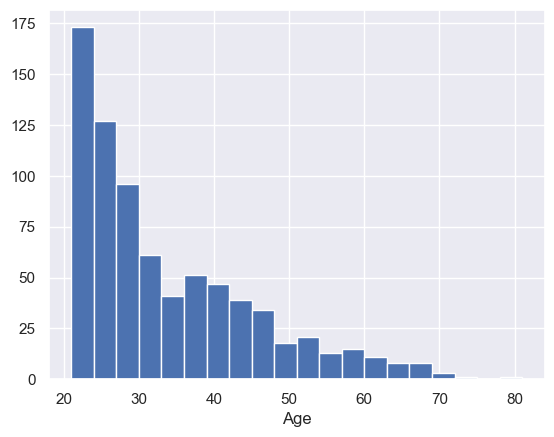

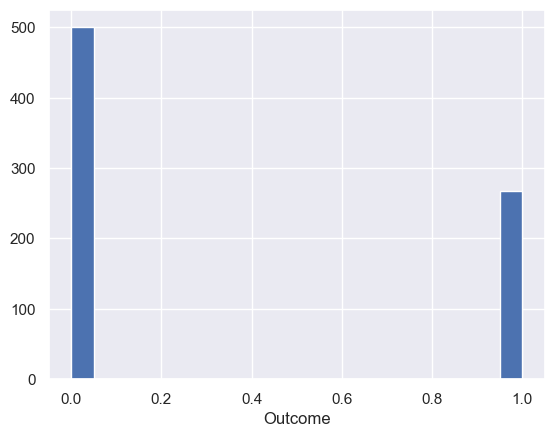

In [29]:
# CALLING THE FUNCTION
cols = [col for col in df.columns if "Outcome" not in col]

for col in df.columns:
    plot_numerical_col(df, col)

# TARGET VALUES WITH INDEPENDENT VARIABLES

In [30]:
df.groupby("Outcome").agg({"Pregnancies": "mean"})

,Pregnancies
Outcome,
0,3.298
1,4.866


In [34]:
# GENERALISE FOR ALL VARIABLES USING FUNCTION

def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col : "mean"}), end="\n\n\n")

In [35]:
# CALLING THE ABOVE GENERALISED FUNCTION
cols = [col for col in df.columns if "Outcome" not in col]

for col in cols:
    target_summary_with_num(df,"Outcome",col)

         Pregnancies
Outcome             
0              3.298
1              4.866


         Glucose
Outcome         
0        109.980
1        141.257


         BloodPressure
Outcome               
0               68.184
1               70.825


         SkinThickness
Outcome               
0               19.664
1               22.164


         Insulin
Outcome         
0         68.792
1        100.336


           BMI
Outcome       
0       30.304
1       35.143


         DiabetesPedigreeFunction
Outcome                          
0                           0.430
1                           0.550


           Age
Outcome       
0       31.190
1       37.067




# DATA PREPROCESSING

In [ ]:
# FIRST 5 ELEMENTS
df.shape
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [38]:
# MISSING VALUES IN THE DATA SET
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000,3.845,3.370,0.000,1.000,3.000,6.000,17.000
Glucose,768.000,120.895,31.973,0.000,99.000,117.000,140.250,199.000
BloodPressure,768.000,69.105,19.356,0.000,62.000,72.000,80.000,122.000
SkinThickness,768.000,20.536,15.952,0.000,0.000,23.000,32.000,99.000
Insulin,768.000,79.799,115.244,0.000,0.000,30.500,127.250,846.000
BMI,768.000,31.993,7.884,0.000,27.300,32.000,36.600,67.100
DiabetesPedigreeFunction,768.000,0.472,0.331,0.078,0.244,0.372,0.626,2.420
Age,768.000,33.241,11.760,21.000,24.000,29.000,41.000,81.000
Outcome,768.000,0.349,0.477,0.000,0.000,0.000,1.000,1.000


From the above output, if the Gulucose, BP, BMI, Insulin is 0, then the data are problematic values. 

In [ ]:
# MISSIG VALUES IN THE ABOVE DATA SET HAS BEEN REPLACED WITH 0 INTHE DATASET

FUNCTION TO CREATE THE OUTLINER TO CALCULATE THE UPPER AND LOWER THRESHOLD VALUES

In [41]:
cols = [col for col in df.columns if "Outcome" not in col]

In [46]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [53]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [50]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [54]:
for col in cols:
    print(col,  " : ", check_outlier(df,col))

Pregnancies  :  False
Glucose  :  False
BloodPressure  :  False
SkinThickness  :  False
Insulin  :  True
BMI  :  False
DiabetesPedigreeFunction  :  False
Age  :  False


In [55]:
replace_with_thresholds(df,"Insulin")

C:\Users\kamal\AppData\Local\Temp\ipykernel_15896\130684917.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-439.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit


In [56]:
for col in cols:
    print(col,  " : ", check_outlier(df,col))

Pregnancies  :  False
Glucose  :  False
BloodPressure  :  False
SkinThickness  :  False
Insulin  :  False
BMI  :  False
DiabetesPedigreeFunction  :  False
Age  :  False


In [59]:
# USE ROBUSTSCALER FUNCTION
for col in cols:
    df[col] = RobustScaler().fit_transform(df[[col]])

# Robst Scaler will subtract the median from all the values in a featuer and divides by the range

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.600,0.752,0.000,0.375,-0.240,0.172,0.665,1.235,1
1,-0.400,-0.776,-0.333,0.188,-0.240,-0.581,-0.056,0.118,0
2,1.000,1.600,-0.444,-0.719,-0.240,-0.935,0.783,0.176,1
3,-0.400,-0.679,-0.333,0.000,0.499,-0.419,-0.537,-0.471,0
4,-0.600,0.485,-1.778,0.375,1.081,1.194,5.008,0.235,1


# MODEL AND PREDICTION

FOCUS IS TO MODEL THE RELATIONSHIP BETWEEN THE INDEPENDENT AND DEPENDENT VARIABLES

In [60]:
# MODEL THE DF 
X = df.drop(["Outcome"], axis=1)
y = df["Outcome"]

In [61]:
# MODEL THAT CAN RELATION BETWEEN THEM (X,y)
log_model = LogisticRegression().fit(X,y)

In [ ]:
log_model.intercept_ # THIS ISNT A COEFFICIENT AS ITS NOT DEPENDENT ON A VARIABLE, ITS CONSTANT

array([-1.23367499])

In [ ]:
log_model.coef_ # COEFF OF INDEPENDENT VARIABLES 

array([[ 0.60026858,  1.41864488, -0.2317767 ,  0.02249032, -0.14660392,
         0.81662929,  0.35519151,  0.25514769]])

In [66]:
# PREDICTIONS
y_pred = log_model.predict(X)

# FIRST 10 VALUES OF PREDICTED
y_pred[0:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

# MODEL EVALUATION

In [67]:
# USING CONFUSION MATRIX - GREAT TOOL FOR DERIVING KEY METRICES LIK PRECISION RECALL F1 SCORE AND ACCURACY 

## FUNCTION
def plot_confusion_matrix(y, y_pred):
    acc = round(accuracy_score(y, y_pred), 2)
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt=".0f")
    plt.xlabel('y_pred')
    plt.ylabel('y')
    plt.title('Accuracy Score: {0}'.format(acc), size=10)
    plt.show()

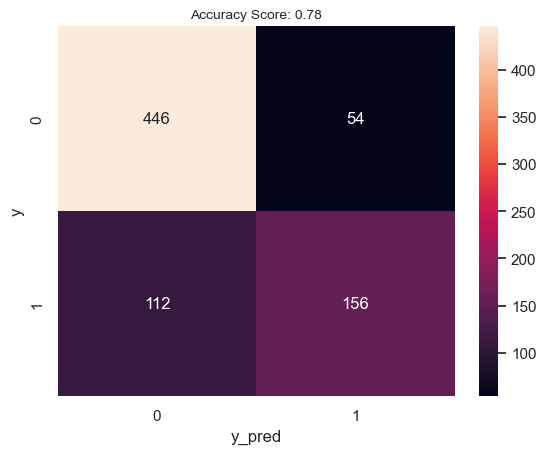

In [68]:
plot_confusion_matrix(y,y_pred)

In [69]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       500
           1       0.74      0.58      0.65       268

    accuracy                           0.78       768
   macro avg       0.77      0.74      0.75       768
weighted avg       0.78      0.78      0.78       768



In [ ]:
# ROC AUC VALUE - Its a general metric for our success at different classification thresholds we should focus on.
y_prob = log_model.predict_proba(X)[:, 1]
roc_auc_score(y, y_prob)

0.8394104477611941

# MODEL VALIDATION

In [72]:
## X - INDEPENDENT VARIABLES
## y - DEPENDENT VARIABLES 
## TRAINING SET - 80%
## TEST SET - 20%
## random_state =  
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20, random_state=17)

log_model = LogisticRegression().fit(X_train, y_train)

# FOR PREDICTION 
y_pred = log_model.predict(X_test)

# TO PERFORM THE AUC CALCULATION, LETS CALCULATE THE MEMBERSHIP PORBABILITIES ALONG WITH THESE PREDICTED VALUES
# SENDING THE INDEPENDENT VALUES
y_prob = log_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84        97
           1       0.79      0.53      0.63        57

    accuracy                           0.77       154
   macro avg       0.78      0.72      0.73       154
weighted avg       0.78      0.77      0.76       154



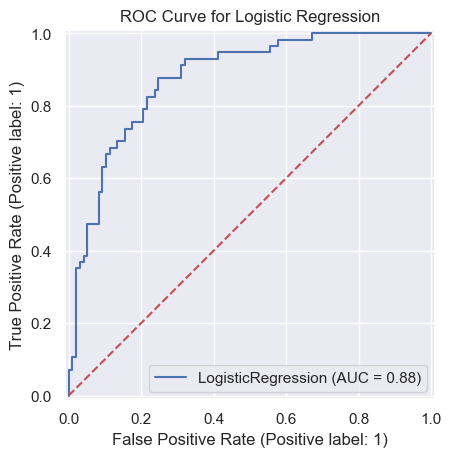

In [74]:
## DRAWING THE ROC CURVE
RocCurveDisplay.from_estimator(log_model, X_test, y_test)
plt.title("ROC Curve for Logistic Regression")
plt.plot([0, 1], [0, 1], 'r--')
plt.grid(True)
plt.show()

In [76]:
# AUC
roc_auc_score(y_test, y_prob)

0.8755652016639537

#  MODEL VALIDATION : 10-FOLD CROSS VALIDATION METHOD

In [77]:
## METHOD THAT WILL HELP US TO TACKLE WITH THE VALIDATION PHASE OF THE MODEL - THE SOLUTION IS CROSS VALIDATION WITH 10 FOLD CROSS VALIATION

## This imply that the data set is divided into 10 parts - 9 Parts are used to build the model and 1 part for testing. Then the model is built again
##      with different set of nine parts and 1 part. This will be repeated for 10 times, then we average all the test errors / validation errors 
##      The model that have been trained and tested with different parts of data set, effictively includes various possible scenarios. 

y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

log_model = LogisticRegression().fit(X, y)

cv_results = cross_validate(log_model,
                            X, y,
                            cv=5,
                            scoring=["accuracy", "precision", "recall", "f1", "roc_auc"])

In [78]:
cv_results

{'fit_time': array([0.01169419, 0.00844383, 0.01767325, 0.00168395, 0.00690699]),
 'score_time': array([0.03620267, 0.02379322, 0.03049135, 0.03364778, 0.03394866]),
 'test_accuracy': array([0.77272727, 0.74675325, 0.75324675, 0.81699346, 0.77124183]),
 'test_precision': array([0.71111111, 0.64705882, 0.71052632, 0.79069767, 0.73684211]),
 'test_recall': array([0.59259259, 0.61111111, 0.5       , 0.64150943, 0.52830189]),
 'test_f1': array([0.64646465, 0.62857143, 0.58695652, 0.70833333, 0.61538462]),
 'test_roc_auc': array([0.81277778, 0.80907407, 0.82518519, 0.87358491, 0.84377358])}

In [ ]:
cv_results['test_accuracy'].mean()
# Accuracy: 0.7721

0.832879105520615

In [80]:
cv_results['test_precision'].mean()
# Precision: 0.7192

0.7192472060223519

In [81]:
cv_results['test_recall'].mean()
# Recall: 0.5747

0.5747030048916841

In [82]:
cv_results['test_f1'].mean()
# F1-score: 0.6371

0.6371421090986309

In [83]:
cv_results['test_roc_auc'].mean()
# AUC: 0.8327

0.832879105520615

# PREDICTIONS FOR A NEW OBSERVATION

In [ ]:

X.columns

random_user = X.sample(1, random_state=45)
log_model.predict(random_user)